# Importing FB Prophet for Time Series Forecasting

In [14]:
# check prophet version
import prophet
# print version number
print('Prophet %s' % prophet.__version__)

Prophet 1.0


Loading the Data

In [28]:
# load the car sales dataset
from pandas import read_csv
# load data
# path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
# df = read_csv(path, header=0)
df = read_csv("Electric_Production.csv",header=0)
# summarize shape
print(df.shape)
# show first few rows
print(df.head())
print(df)

(397, 2)
       DATE  IPG2211A2N
0  1/1/1985     72.5052
1  2/1/1985     70.6720
2  3/1/1985     62.4502
3  4/1/1985     57.4714
4  5/1/1985     55.3151
          DATE  IPG2211A2N
0     1/1/1985     72.5052
1     2/1/1985     70.6720
2     3/1/1985     62.4502
3     4/1/1985     57.4714
4     5/1/1985     55.3151
..         ...         ...
392   9/1/2017     98.6154
393  10/1/2017     93.6137
394  11/1/2017     97.3359
395  12/1/2017    114.7212
396   1/1/2018    129.4048

[397 rows x 2 columns]


Visualizing the dataset

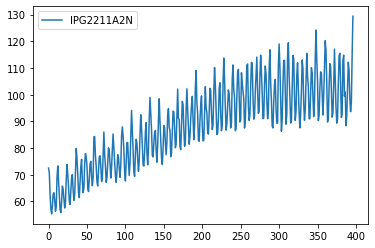

In [29]:
# plot the car sales dataset
from matplotlib import pyplot

# plot the time series
df.plot()
pyplot.show()

# Fitting the FB Prophet model

In [30]:
# fit prophet model on the car sales dataset
from pandas import to_datetime
from prophet import Prophet

# prepare expected column names
df.columns = ['ds', 'y']
# print(df)
df['ds']= to_datetime(df['ds'])
print(df)

            ds         y
0   1985-01-01   72.5052
1   1985-02-01   70.6720
2   1985-03-01   62.4502
3   1985-04-01   57.4714
4   1985-05-01   55.3151
..         ...       ...
392 2017-09-01   98.6154
393 2017-10-01   93.6137
394 2017-11-01   97.3359
395 2017-12-01  114.7212
396 2018-01-01  129.4048

[397 rows x 2 columns]


In [31]:
# define the model
model = Prophet()
# fit the model
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
from pandas import DataFrame
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '2017-%02d' % i
	future.append([date])
future = DataFrame(future)
print(future)
future.columns = ['ds']
# print(future)
future['ds']= to_datetime(future['ds'])
print(future)

          0
0   2017-01
1   2017-02
2   2017-03
3   2017-04
4   2017-05
5   2017-06
6   2017-07
7   2017-08
8   2017-09
9   2017-10
10  2017-11
11  2017-12
           ds
0  2017-01-01
1  2017-02-01
2  2017-03-01
3  2017-04-01
4  2017-05-01
5  2017-06-01
6  2017-07-01
7  2017-08-01
8  2017-09-01
9  2017-10-01
10 2017-11-01
11 2017-12-01


In [33]:
# use the model to make a forecast
forecast = model.predict(future)

# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds        yhat  yhat_lower  yhat_upper
0 2017-01-01  116.552742  112.893553  120.467055
1 2017-02-01  108.166916  104.465580  111.877471
2 2017-03-01  102.650995   98.815387  106.460762
3 2017-04-01   94.071188   90.399586   97.819555
4 2017-05-01   94.319662   90.756265   97.755010


Plotting forecast on graph

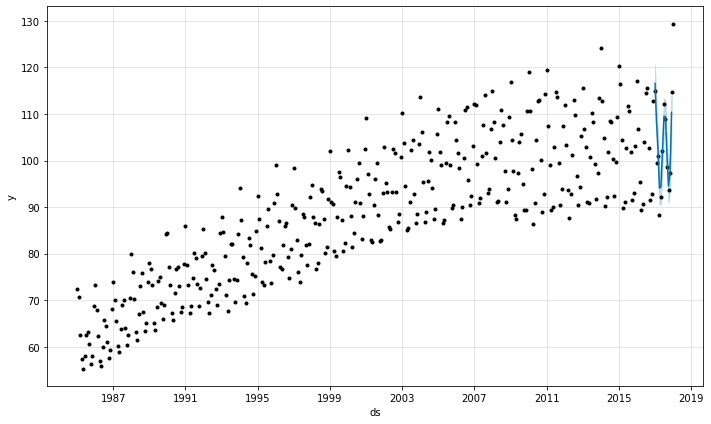

In [34]:
# plot forecast
model.plot(forecast)
pyplot.show()

# Out of sample forecast

In [35]:
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '2018-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

          ds        yhat  yhat_lower  yhat_upper
0 2018-01-01  116.929219  113.317595  120.396418
1 2018-02-01  109.063002  105.274139  112.782837
2 2018-03-01  103.254111   99.803234  107.001199
3 2018-04-01   94.106283   90.740756   97.962772
4 2018-05-01   94.235002   90.662647   97.952280


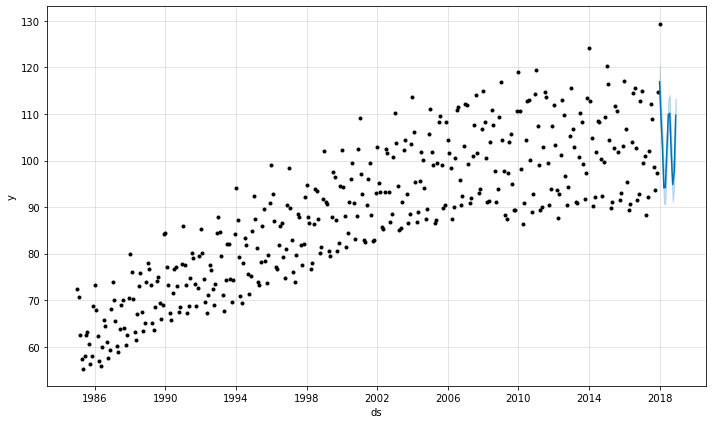

In [36]:
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

# Model Evaluation

In [38]:
# create test dataset, remove last 13 months
train = df.drop(df.index[-13:])
print(train.tail())

            ds         y
379 2016-08-01  115.5159
380 2016-09-01  102.7637
381 2016-10-01   91.4867
382 2016-11-01   92.8900
383 2016-12-01  112.7694


In [39]:
#from prophet import Prophet
from sklearn.metrics import mean_absolute_error


# define the model
model = Prophet()
# fit the model
model.fit(train)
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '2017-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# calculate MAE between expected and predicted values for december
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAE: 9.717


Plot of expected vs actual value

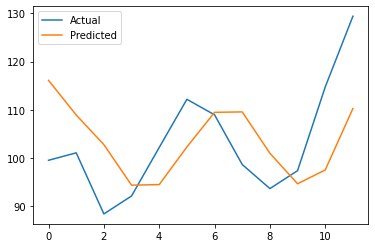

In [40]:
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.savefig("actual_vs_expected.png") 
pyplot.show()